# Install Package & Import Data

In [ ]:
#Install Package
install.packages("timeSeries")
install.packages("tseries")
install.packages("forecast")
install.packages("ggplot2")
install.packages("TSstudio")
install.packages("lmtest")
install.packages("keras")
install.packages("tensorflow")
install.packages("quantmod")
install.packages("rugarch")
install.packages("readxl")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘timeDate’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘urca’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘RcppEigen’, ‘hts’, ‘iterators’, ‘later’, ‘BH’, ‘thief’, ‘doParallel’, ‘foreach’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’, ‘plyr’, ‘anytime’, ‘gridExtra’, ‘forecastHybrid’, ‘plotly’, ‘reshape2’, ‘tsibble’, ‘viridis’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing packag

In [ ]:
#Install library
library(timeSeries)
library(tseries)
library(forecast)
library(ggplot2)
library(TSstudio)
library(quantmod)
library(readxl)
library(lmtest)
library(dplyr)
library(keras)

Loading required package: timeDate


Attaching package: ‘timeSeries’


The following objects are masked from ‘package:graphics’:

    lines, points


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following object is masked from ‘package:timeSeries’:

    time<-


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR


######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                      

In [ ]:
#Input Data
df <- read_xlsx("/content/data.xlsx")
head(df)

Period,Claim
<dttm>,<dbl>
2019-01-01,8.3950
2019-02-01,11.1300
2019-03-01,9.4175
2019-04-01,11.9100
2019-05-01,10.3600
2019-06-01,10.0650


In [ ]:
#Time Series Data
data <- ts(df$Claim, start=c(2019,1), end=c(2023,11), frequency=12)
data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2019,8.395000,11.130000,9.417500,11.910000,10.360000,10.065000,5.839000,3.610000,3.140000,6.163000,7.717000,5.360000
2020,1.270000,3.128000,6.964000,10.659000,8.570000,3.833000,4.890000,6.250000,7.090000,12.450000,5.109000,5.105055
2021,9.620000,11.213000,10.961500,8.900000,3.143000,4.275000,11.255000,8.631000,17.778000,23.985500,19.640000,29.123000
2022,10.863500,18.585000,17.775000,5.280000,19.410250,14.715000,19.715000,9.752000,18.352500,24.184500,14.940000,16.473000
2023,14.335000,10.099000,20.845000,15.705000,28.906350,24.489000,13.605500,32.048500,30.297500,31.588500,25.502000,


In [ ]:
#Descriptive Analysis and Data Visualization
summary(data)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.270   6.607  10.864  12.956  18.065  32.048 

## ARIMA

### Stasioneritas Data

In [ ]:
# Uji Stasioneritas Data
adf.test(data)


	Augmented Dickey-Fuller Test

data:  data
Dickey-Fuller = -3.5112, Lag order = 3, p-value = 0.04838
alternative hypothesis: stationary


### Transformasi Data

In [ ]:
# Diferensiasi Transformasi Data
ndiffs(log(data),"adf")

Warning message in ndiffs(log(data), "adf"):
“Specified alpha value is larger than the maximum, setting alpha=0.1”


[1] 1

Warning message in adf.test(ddif1):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  ddif1
Dickey-Fuller = -6.2919, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


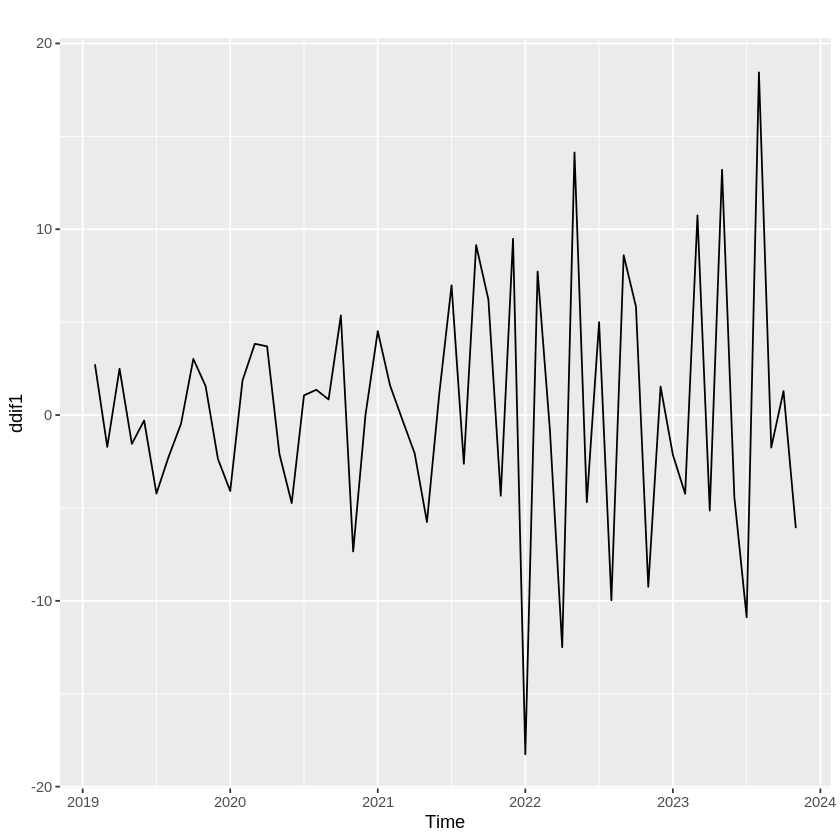

In [ ]:
#Transformasi Diff 1
ddif1 = diff(data, differences=1)
adf.test(ddif1)
autoplot(ddif1)

Warning message in adf.test(dtrans1):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  dtrans1
Dickey-Fuller = -7.4198, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


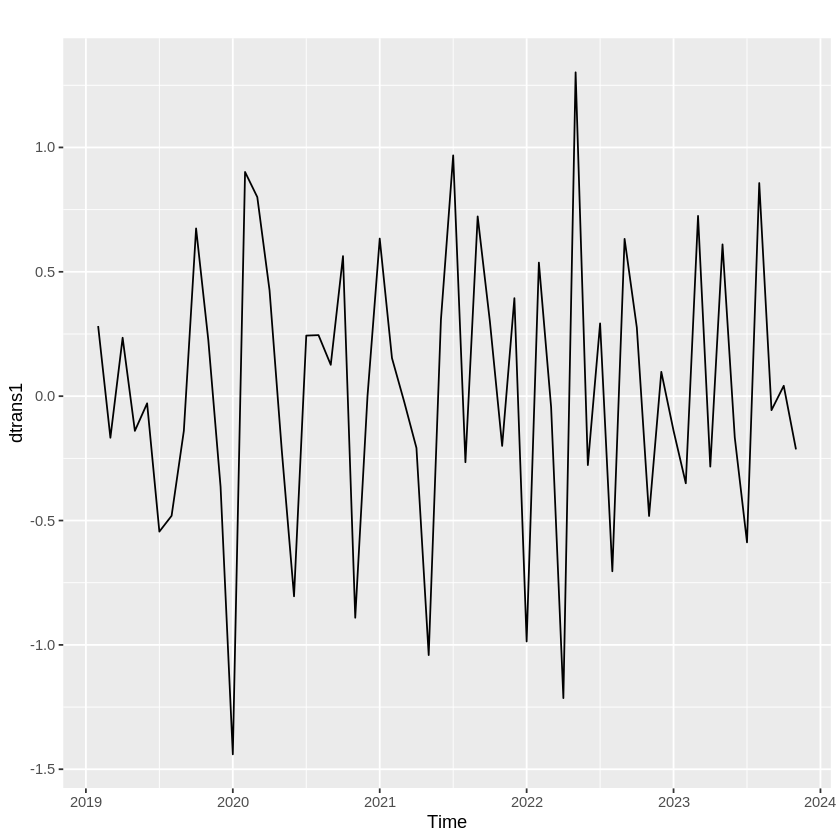

In [ ]:
#Transformasi Diff 1 with Log-Trans
dtrans1 = diff(log(data), differences=1)
adf.test(dtrans1)
autoplot(dtrans1)

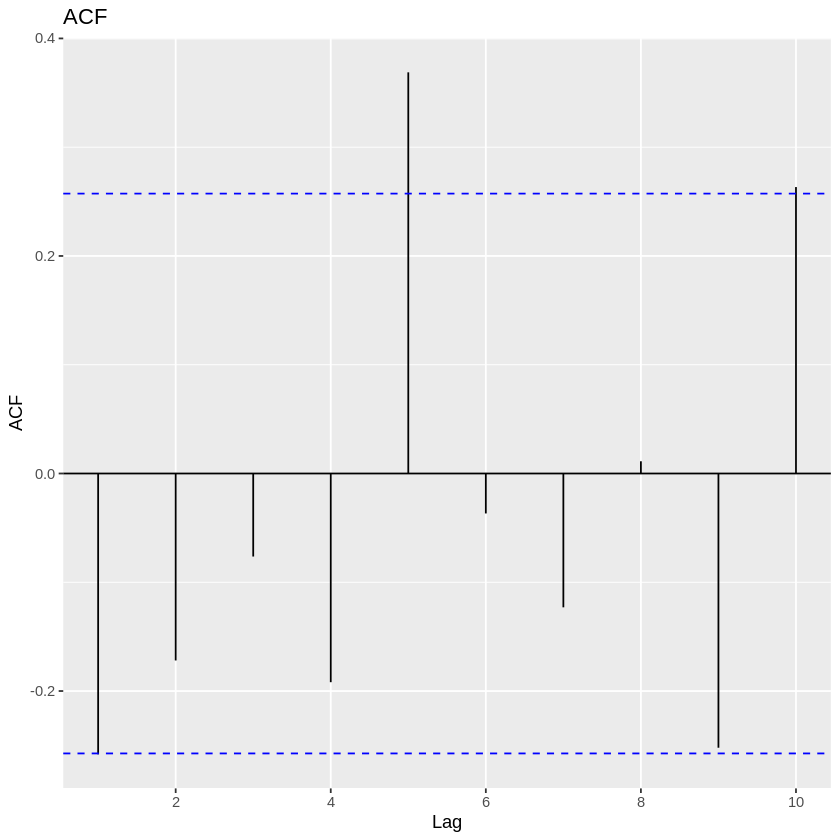

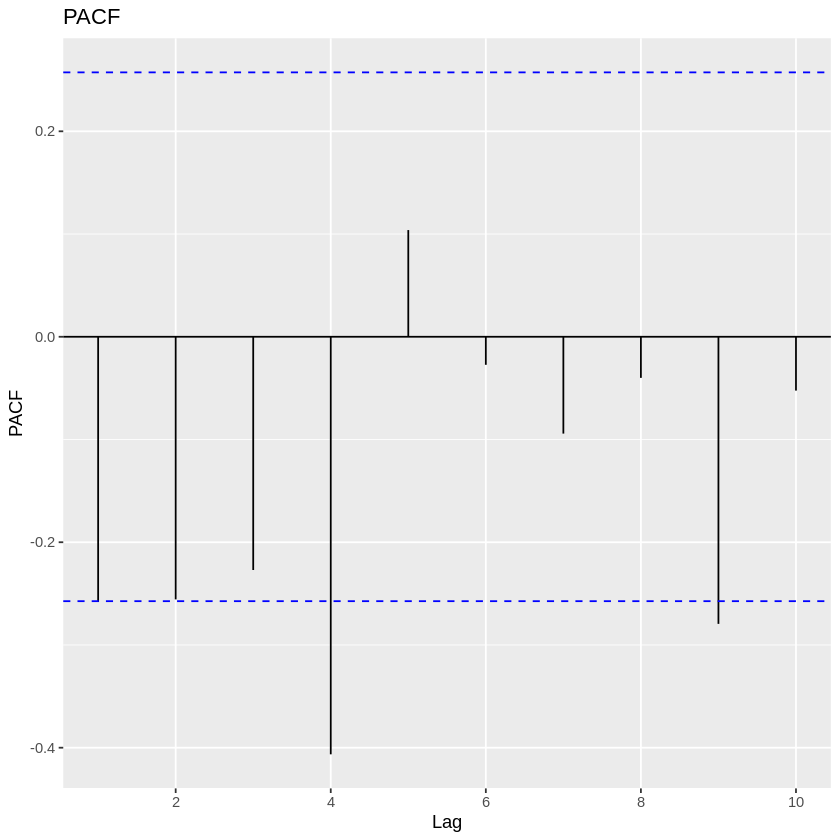

In [ ]:
# Membuat plot ACF dan PACF
ggAcf(dtrans1,lag.max = 10) + ggtitle("ACF")
ggPacf(dtrans1,lag.max = 10) + ggtitle("PACF")

Diperoleh ARIMA (4,1,1)

### Underfitting

In [ ]:
#1
c411 = Arima(data,order=c(4,1,1),include.constant = T, lambda = 0)
coeftest(c411) #tidak sig.


z test of coefficients:

       Estimate Std. Error z value  Pr(>|z|)    
ar1   -0.668575   0.233325 -2.8654 0.0041645 ** 
ar2   -0.532889   0.151473 -3.5181 0.0004347 ***
ar3   -0.435149   0.142875 -3.0457 0.0023216 ** 
ar4   -0.443999   0.116940 -3.7968 0.0001466 ***
ma1    0.243375   0.253998  0.9582 0.3379737    
drift  0.017770   0.025241  0.7040 0.4814267    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
#2
tc411 = Arima(data,order=c(4,1,1),include.constant = F, lambda = 0)
coeftest(tc411) #tidak sig.


z test of coefficients:

    Estimate Std. Error z value  Pr(>|z|)    
ar1 -0.67016    0.23150 -2.8948 0.0037939 ** 
ar2 -0.52820    0.15120 -3.4934 0.0004769 ***
ar3 -0.43045    0.14277 -3.0150 0.0025700 ** 
ar4 -0.44132    0.11691 -3.7748 0.0001602 ***
ma1  0.25150    0.25047  1.0041 0.3153263    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
#3
c410 = Arima(data,order=c(4,1,0),include.constant = T, lambda = 0)
coeftest(c410) #tidak sig.


z test of coefficients:

       Estimate Std. Error z value  Pr(>|z|)    
ar1   -0.469164   0.118971 -3.9435  8.03e-05 ***
ar2   -0.456073   0.124553 -3.6617 0.0002506 ***
ar3   -0.370243   0.121903 -3.0372 0.0023879 ** 
ar4   -0.396325   0.117303 -3.3786 0.0007285 ***
drift  0.017625   0.023453  0.7515 0.4523572    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
#4
tc410 = Arima(data,order=c(4,1,0),include.constant = F, lambda = 0)
coeftest(tc410) #signifikan


z test of coefficients:

    Estimate Std. Error z value  Pr(>|z|)    
ar1 -0.46325    0.11932 -3.8825 0.0001034 ***
ar2 -0.44916    0.12484 -3.5980 0.0003207 ***
ar3 -0.36386    0.12224 -2.9766 0.0029143 ** 
ar4 -0.39217    0.11778 -3.3296 0.0008697 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
#5
c311 = Arima(data,order=c(3,1,1),include.constant = T, lambda = 0)
coeftest(c311) #tidak sig.


z test of coefficients:

         Estimate  Std. Error  z value  Pr(>|z|)    
ar1    0.43937173  0.13179472   3.3338 0.0008568 ***
ar2   -0.05840263  0.14237916  -0.4102 0.6816660    
ar3    0.00095906  0.13445084   0.0071 0.9943086    
ma1   -0.99999930  0.06434064 -15.5423 < 2.2e-16 ***
drift  0.02662686  0.00573817   4.6403 3.479e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
#6
tc311 = Arima(data,order=c(3,1,1),include.constant = F, lambda = 0)
coeftest(tc311) #tidak sig.


z test of coefficients:

    Estimate Std. Error z value Pr(>|z|)   
ar1  0.18911    0.25744  0.7346 0.462587   
ar2 -0.15057    0.15342 -0.9814 0.326383   
ar3 -0.12597    0.16688 -0.7549 0.450323   
ma1 -0.65973    0.23647 -2.7899 0.005272 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
#7
c310 = Arima(data,order=c(3,1,0),include.constant = T, lambda = 0)
coeftest(c310) #tidak sig.


z test of coefficients:

       Estimate Std. Error z value Pr(>|z|)   
ar1   -0.379362   0.127661 -2.9716 0.002962 **
ar2   -0.320643   0.128352 -2.4982 0.012484 * 
ar3   -0.219369   0.125087 -1.7537 0.079475 . 
drift  0.019438   0.035693  0.5446 0.586030   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
#8
tc310 = Arima(data,order=c(3,1,0),include.constant = F, lambda = 0)
coeftest(tc310) #tidak sig.


z test of coefficients:

    Estimate Std. Error z value Pr(>|z|)   
ar1 -0.37543    0.12779 -2.9379 0.003304 **
ar2 -0.31631    0.12845 -2.4626 0.013793 * 
ar3 -0.21559    0.12523 -1.7216 0.085141 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
#9
c211 = Arima(data,order=c(2,1,1),include.constant = T, lambda = 0)
coeftest(c211) #tidak sig.


z test of coefficients:

        Estimate Std. Error  z value  Pr(>|z|)    
ar1    0.4392803  0.1311030   3.3506 0.0008062 ***
ar2   -0.0580543  0.1338709  -0.4337 0.6645364    
ma1   -0.9999983  0.0643965 -15.5288 < 2.2e-16 ***
drift  0.0266296  0.0057184   4.6568 3.211e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
#10
tc211 = Arima(data,order=c(2,1,1),include.constant = F, lambda = 0)
coeftest(tc211) #tidak sig.


z test of coefficients:

    Estimate Std. Error z value  Pr(>|z|)    
ar1  0.30076    0.18002  1.6707   0.09479 .  
ar2 -0.13206    0.14837 -0.8901   0.37342    
ma1 -0.76216    0.13727 -5.5524 2.817e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
#11
c210 = Arima(data,order=c(2,1,0),include.constant = T, lambda = 0)
coeftest(c210) #tidak sig.


z test of coefficients:

       Estimate Std. Error z value Pr(>|z|)  
ar1   -0.320499   0.126547 -2.5326  0.01132 *
ar2   -0.248743   0.125024 -1.9896  0.04664 *
drift  0.019424   0.044572  0.4358  0.66299  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
#12
tc210 = Arima(data,order=c(2,1,0),include.constant = F, lambda = 0)
coeftest(tc210) #signifikan


z test of coefficients:

    Estimate Std. Error z value Pr(>|z|)  
ar1 -0.31811    0.12664 -2.5120  0.01200 *
ar2 -0.24621    0.12510 -1.9681  0.04906 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
#13
c111 = Arima(data,order=c(1,1,1),include.constant = T, lambda = 0)
coeftest(c111) #signifikan


z test of coefficients:

        Estimate Std. Error  z value  Pr(>|z|)    
ar1    0.4190171  0.1228377   3.4111 0.0006469 ***
ma1   -0.9999995  0.0610936 -16.3683 < 2.2e-16 ***
drift  0.0264788  0.0060373   4.3859 1.155e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
#14
tc111 = Arima(data,order=c(1,1,1),include.constant = F, lambda = 0)
coeftest(tc111) #tidak sig.


z test of coefficients:

     Estimate Std. Error z value Pr(>|z|)    
ar1  0.325959   0.167482  1.9462  0.05163 .  
ma1 -0.818653   0.096262 -8.5045  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
#15
c011 = Arima(data,order=c(0,1,1),include.constant = T, lambda = 0)
coeftest(c011) #tidak sig.


z test of coefficients:

       Estimate Std. Error z value  Pr(>|z|)    
ma1   -0.685607   0.141462 -4.8466 1.256e-06 ***
drift  0.019661   0.021997  0.8938    0.3714    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
#16
tc011 = Arima(data,order=c(0,1,1),include.constant = F, lambda = 0)
coeftest(tc011) #signifikan


z test of coefficients:

    Estimate Std. Error z value  Pr(>|z|)    
ma1 -0.64484    0.13375 -4.8214 1.426e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
#17
c110 = Arima(data,order=c(1,1,0),include.constant = T, lambda = 0)
coeftest(c110) #tidak sig.


z test of coefficients:

       Estimate Std. Error z value Pr(>|z|)  
ar1   -0.255484   0.126047 -2.0269  0.04267 *
drift  0.019053   0.057316  0.3324  0.73958  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
#18
tc110 = Arima(data,order=c(1,1,0),include.constant = F, lambda = 0)
coeftest(tc110) #signifikan


z test of coefficients:

    Estimate Std. Error z value Pr(>|z|)  
ar1 -0.25413    0.12610 -2.0152  0.04388 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Diperoleh model yang signifikan yaitu model tc410, tc210, c111, tc011, dan tc110.


### Diagnostic Checking


	Box-Ljung test

data:  tc410$residuals
X-squared = 0.061274, df = 1, p-value = 0.8045



	Box-Ljung test

data:  (tc410$residuals)^2
X-squared = 0.073758, df = 1, p-value = 0.7859



	Jarque Bera Test

data:  tc410$residuals
X-squared = 5.4095, df = 2, p-value = 0.06689



	Ljung-Box test

data:  Residuals from ARIMA(4,1,0)
Q* = 7.849, df = 8, p-value = 0.4484

Model df: 4.   Total lags used: 12



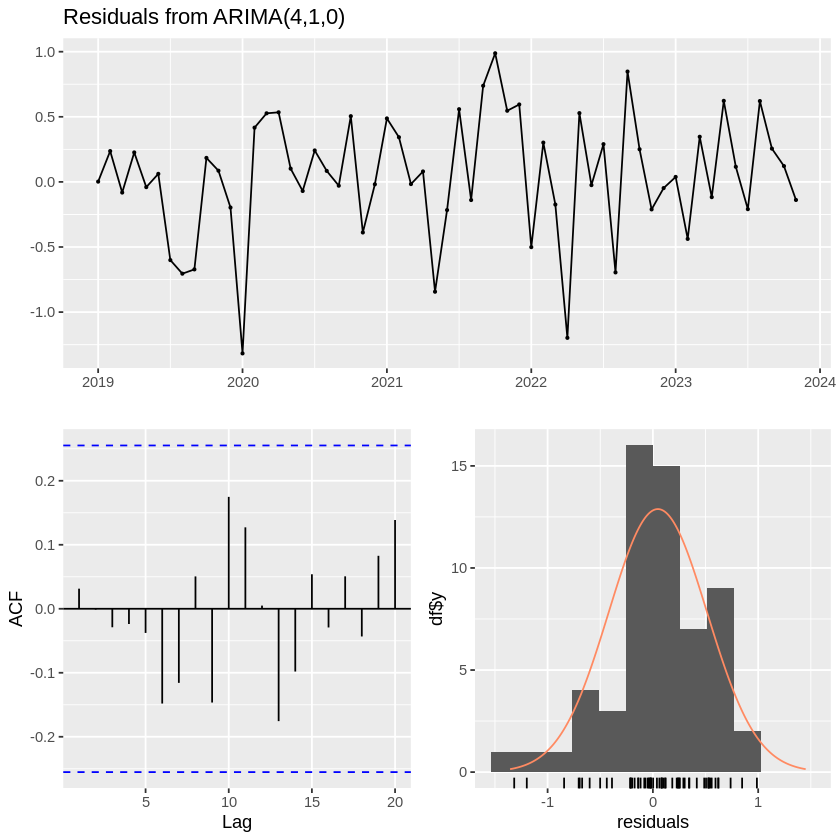

In [ ]:
#Diagnostic Checking tc410
Box.test(tc410$residuals,type="Ljung") #uji autokorelasi
Box.test((tc410$residuals)^2,type="Ljung") #uji homoskedastik
jarque.bera.test(tc410$residuals) #uji normalitas
checkresiduals(tc410)


	Box-Ljung test

data:  tc210$residuals
X-squared = 0.25476, df = 1, p-value = 0.6137



	Box-Ljung test

data:  (tc210$residuals)^2
X-squared = 0.97865, df = 1, p-value = 0.3225



	Jarque Bera Test

data:  tc210$residuals
X-squared = 3.7338, df = 2, p-value = 0.1546



	Ljung-Box test

data:  Residuals from ARIMA(2,1,0)
Q* = 28.48, df = 10, p-value = 0.001512

Model df: 2.   Total lags used: 12



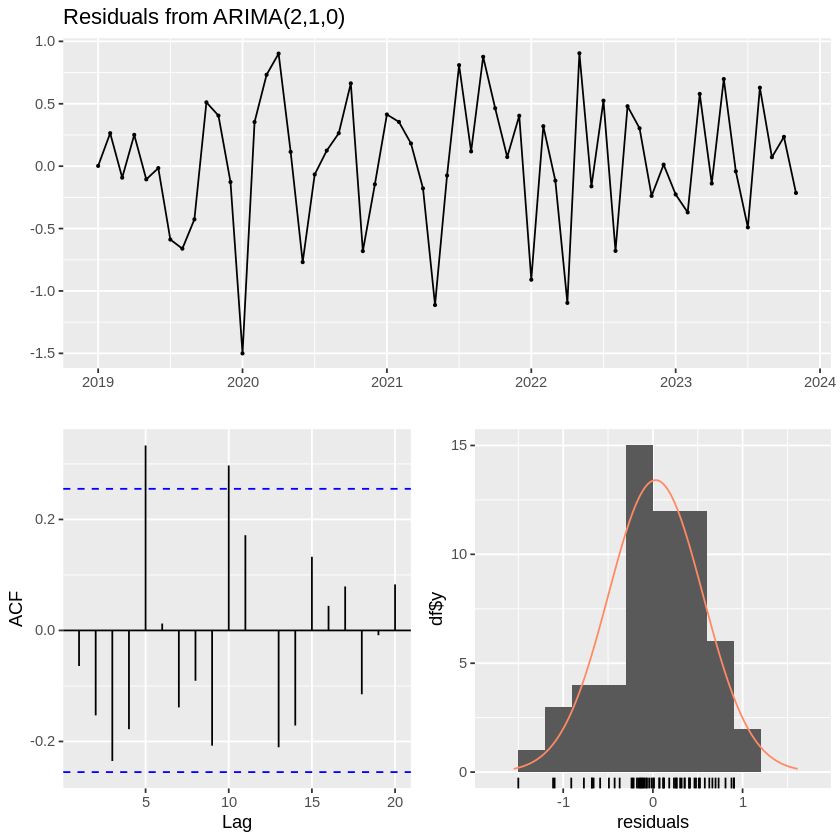

In [ ]:
#Diagnostic Checking tc210
Box.test(tc210$residuals,type="Ljung") #uji autokorelasi
Box.test((tc210$residuals)^2,type="Ljung") #uji homoskedastik
jarque.bera.test(tc210$residuals) #uji normalitas
checkresiduals(tc210)


	Box-Ljung test

data:  c111$residuals
X-squared = 0.00035476, df = 1, p-value = 0.985



	Box-Ljung test

data:  (c111$residuals)^2
X-squared = 0.092953, df = 1, p-value = 0.7605



	Jarque Bera Test

data:  c111$residuals
X-squared = 10.195, df = 2, p-value = 0.006111



	Ljung-Box test

data:  Residuals from ARIMA(1,1,1) with drift
Q* = 18.369, df = 10, p-value = 0.04905

Model df: 2.   Total lags used: 12



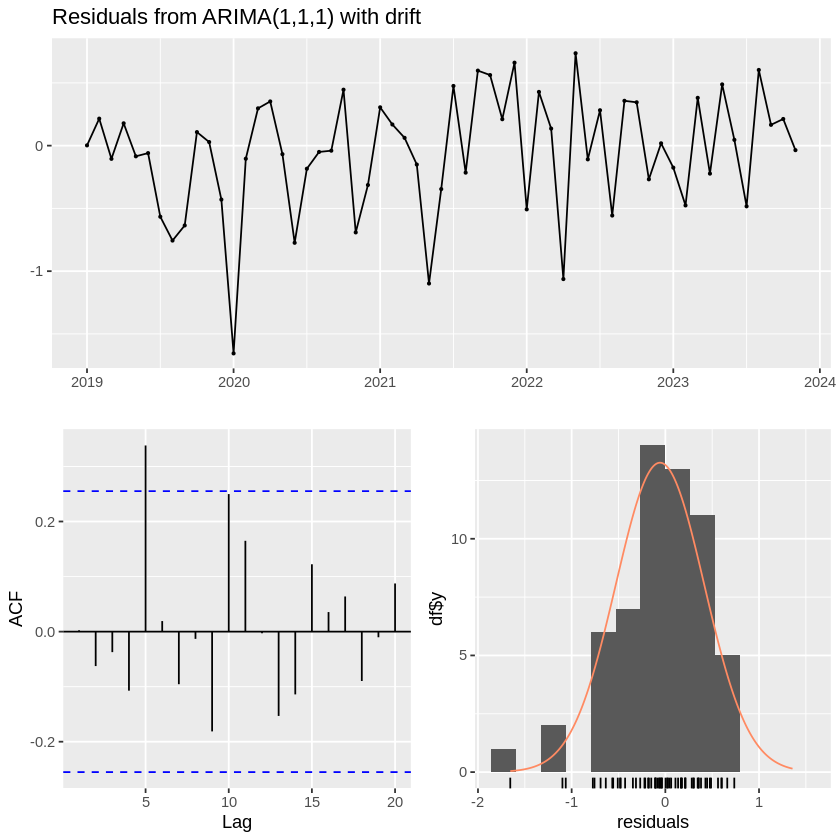

In [ ]:
#Diagnostic Checking c111
Box.test(c111$residuals,type="Ljung") #uji autokorelasi
Box.test((c111$residuals)^2,type="Ljung") #uji homoskedastik
jarque.bera.test(c111$residuals) #uji normalitas
checkresiduals(c111)


	Box-Ljung test

data:  tc110$residuals
X-squared = 0.30454, df = 1, p-value = 0.5811



	Box-Ljung test

data:  (tc110$residuals)^2
X-squared = 0.24899, df = 1, p-value = 0.6178



	Jarque Bera Test

data:  tc110$residuals
X-squared = 2.9486, df = 2, p-value = 0.2289



	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)
Q* = 31.72, df = 11, p-value = 0.0008458

Model df: 1.   Total lags used: 12



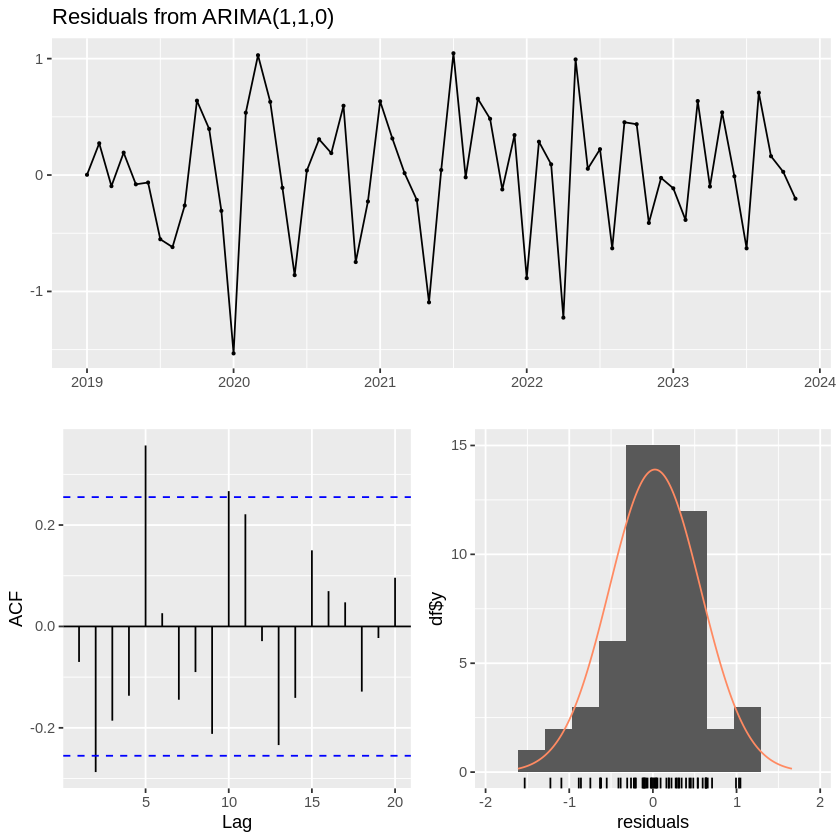

In [ ]:
#Diagnostic Checking tc110
Box.test(tc110$residuals,type="Ljung") #uji autokorelasi
Box.test((tc110$residuals)^2,type="Ljung") #uji homoskedastik
jarque.bera.test(tc110$residuals) #uji normalitas
checkresiduals(tc110)


	Box-Ljung test

data:  tc011$residuals
X-squared = 1.4951, df = 1, p-value = 0.2214



	Box-Ljung test

data:  (tc011$residuals)^2
X-squared = 0.53539, df = 1, p-value = 0.4643



	Jarque Bera Test

data:  tc011$residuals
X-squared = 6.6308, df = 2, p-value = 0.03632



	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)
Q* = 25.331, df = 11, p-value = 0.008151

Model df: 1.   Total lags used: 12



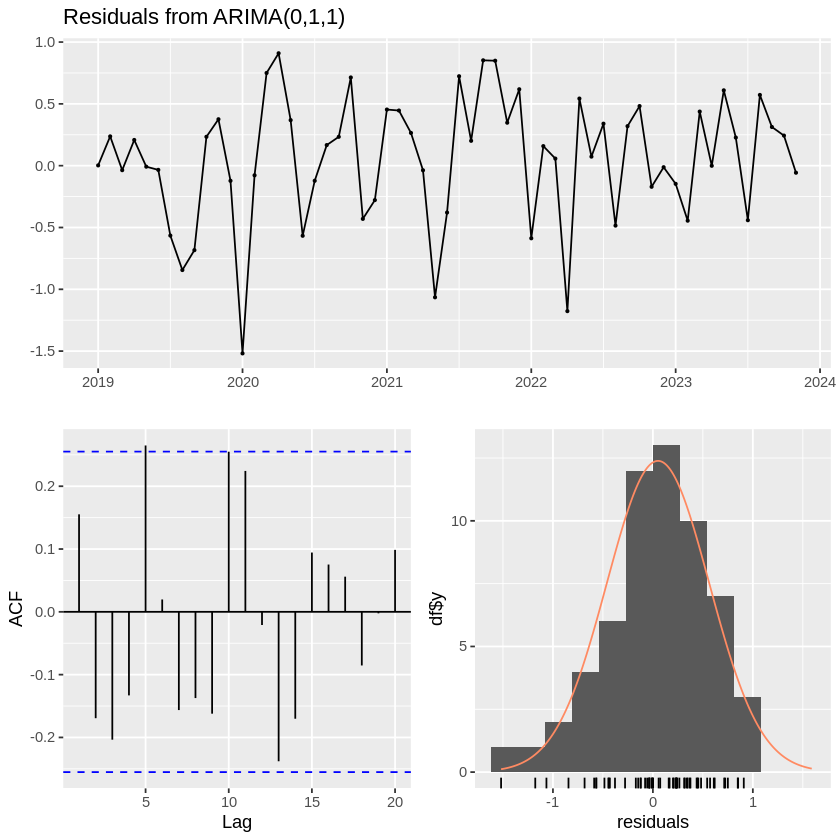

In [ ]:
#Diagnostic Checking tc011
Box.test(tc011$residuals,type="Ljung") #uji autokorelasi
Box.test((tc011$residuals)^2,type="Ljung") #uji homoskedastik
jarque.bera.test(tc011$residuals) #uji normalitas
checkresiduals(tc011)

tc 410 memenuhi semua asumsi, namun kelima model akan diikutsertakan dalam pemilihan model terbaik


### Pemilihan Model Terbaik

In [ ]:
#model tc410
mod_tc410 = data.frame(Model = "tc410", LogLik = logLik(tc410), AIC = AIC(tc410), BIC = BIC(tc410))
mod_tc410
accuracy(tc410)

Model,LogLik,AIC,BIC
<chr>,<dbl>,<dbl>,<dbl>
tc410,-39.05265,88.1053,98.40751


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,1.420499,5.654335,4.085936,-7.504518,39.03255,0.6046154,-0.02136124


model tc410 dikatakan sebagai model terbaik


### Peramalan

Model,LogLik,AIC,BIC
<chr>,<dbl>,<dbl>,<dbl>
tc410,-39.05265,88.1053,98.40751


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,1.420499,5.654335,4.085936,-7.504518,39.03255,0.6046154,-0.02136124


         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Dec 2023       20.15816 10.79349 37.64781 7.754438 52.40242
Jan 2024       24.91645 12.26277 50.62721 8.425530 73.68434
Feb 2024       26.69536 12.81771 55.59823 8.692414 81.98436
Mar 2024       27.85070 13.14570 59.00495 8.834505 87.79911
Apr 2024       26.87953 12.60496 57.31944 8.441948 85.58559
May 2024       24.06062 10.62735 54.47390 6.895442 83.95595
Jun 2024       24.66489 10.30723 59.02229 6.494490 93.67273

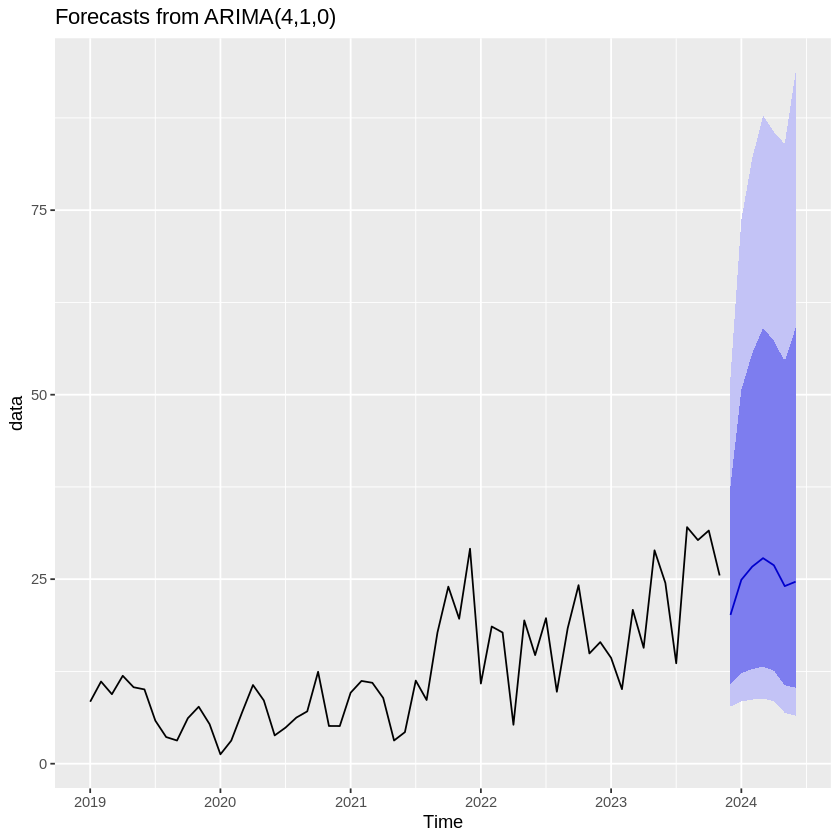

In [ ]:
##Forecast and Accuracy
mod_tc410
accuracy(tc410)
forecast(tc410,7)
autoplot(forecast(tc410,7))